In [4]:
import os
import gc
import warnings

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Configuration
warnings.simplefilter('ignore')
pd.set_option('max_column', None)
sns.set_style("darkgrid")
colors = sns.color_palette('Set2')

In [7]:
#TRAIN_DIR = "../inputs/jpx-tokyo-stock-exchange-prediction/train_files"
TRAIN_DIR = "jpx-tokyo-stock-exchange-prediction/train_files"

In [9]:
%%time

df_prices = pd.read_csv(os.path.join(TRAIN_DIR, 'stock_prices.csv'))
df_prices_sec = pd.read_csv(os.path.join(TRAIN_DIR, 'secondary_stock_prices.csv'))
df_fins = pd.read_csv(os.path.join(TRAIN_DIR, 'financials.csv'))
df_opts = pd.read_csv(os.path.join(TRAIN_DIR, 'options.csv'))
df_trades = pd.read_csv(os.path.join(TRAIN_DIR, 'trades.csv'))
stock_list = pd.read_csv(os.path.join("jpx-tokyo-stock-exchange-prediction/stock_list.csv"))

CPU times: user 16.3 s, sys: 2.29 s, total: 18.6 s
Wall time: 18.7 s


In [ ]:
def plot_candle_with_target(stock_code, prime=True):
    """Plot OHLCV plot with target series.
    
    Parameters:
        stock_code: int, code of the stock
        prime: bool, whether the stock to plot is prime or not
    """
    df_ = df_prices.copy() if prime else df_prices_sec.copy()
    df_ = df_[df_['SecuritiesCode'] == stock_code]
    dates = df_['Date'].values
    ohlc = {
        'open': df_['Open'].values, 
        'high': df_['High'].values, 
        'low': df_['Low'].values, 
        'close': df_['Close'].values
    }
    vol = df_['Volume'].values
    target = df_['Target'].values
    
    fig = make_subplots(rows=3, cols=1, shared_xaxes=True, x_title='Date')
    fig.add_trace(go.Candlestick(x=dates, name='OHLC', **ohlc),
                  row=1, col=1)
    fig.add_trace(go.Bar(x=dates, y=vol, name='Volume'),
                  row=2, col=1)
    fig.add_trace(go.Scatter(x=dates, y=target, name='Target'),
                  row=3, col=1)
    fig.update_layout(
        title=f"OHLCV Chart with Target Series (Stock {stock_code})",
    )
    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.show()

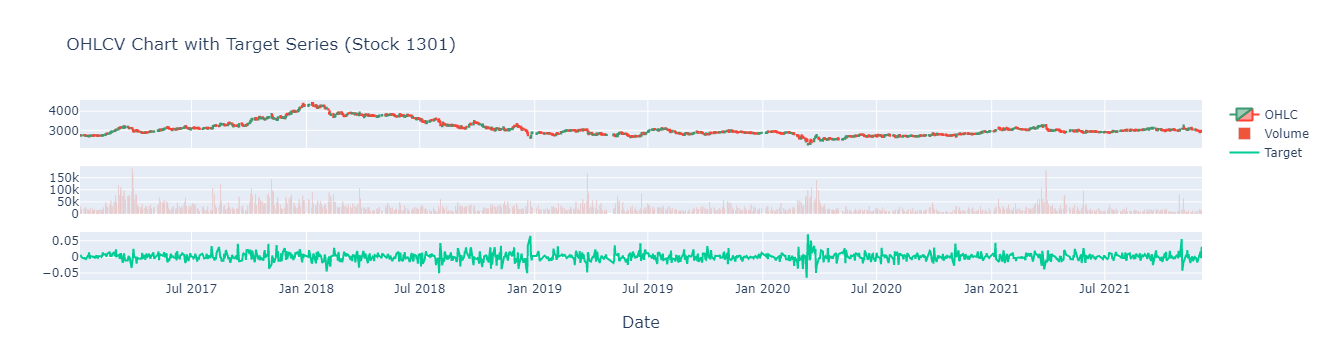

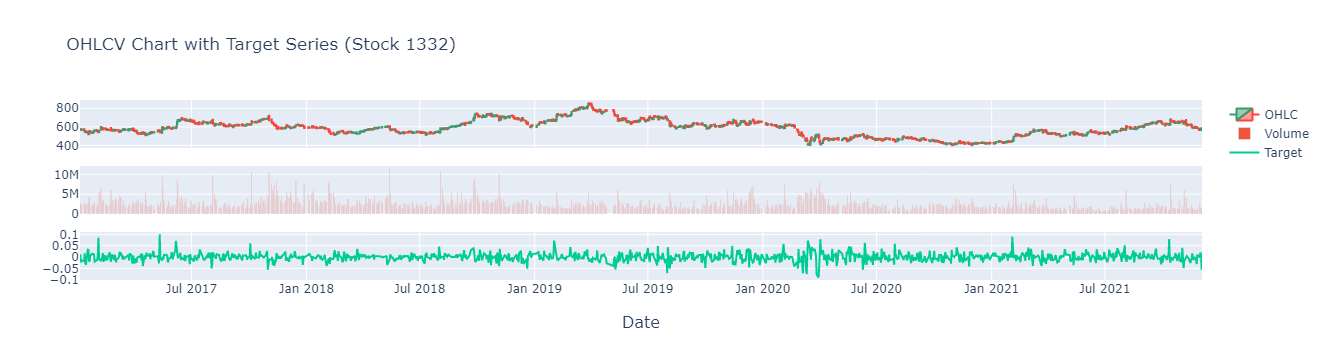

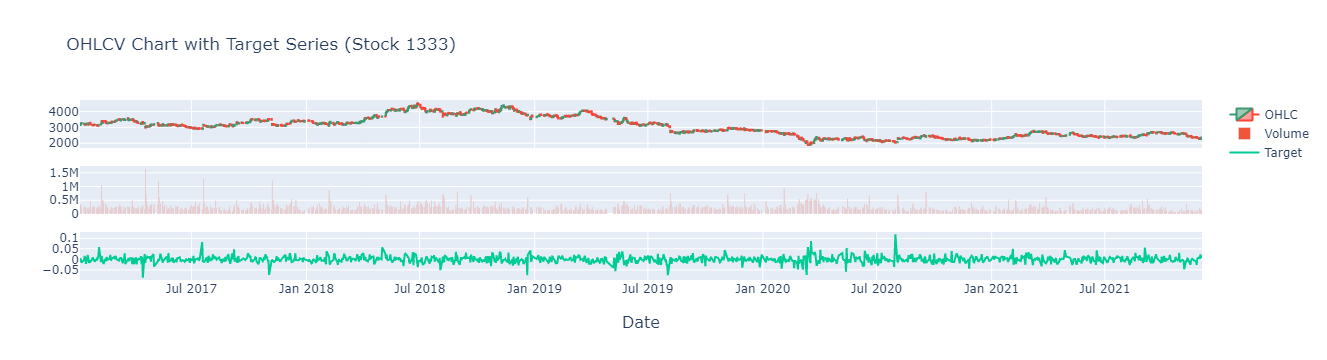

In [18]:
for stock_code in df_prices['SecuritiesCode'].unique()[:3]:
    plot_candle_with_target(stock_code)